In [34]:
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
import time
import joblib
import math
%matplotlib inline

# load the track data 

In [2]:
in_dir = 'D:\\Data\\spotify_album_tracks\\'

In [3]:
master_tracks = joblib.load(in_dir + 'omnibus_album_tracks.pkl')  
master_tracks.shape

(6901, 9)

In [54]:
len(np.unique(master_tracks.album_uri))

479

In [4]:
master_tracks.isnull().sum()

album_uri            0
num_tracks           0
track_number         0
explicit             0
track_name           0
track_type           0
track_duration_ms    0
track_disc_number    0
track_uri            0
dtype: int64

In [5]:
master_tracks.head()

,album_uri,num_tracks,track_number,explicit,track_name,track_type,track_duration_ms,track_disc_number,track_uri
0,spotify:album:3T4tUhGYeRNVUGevb0wThu,16,1,False,Eraser,track,227426,1,spotify:track:7oolFzHipTMg2nL7shhdz2
1,spotify:album:3T4tUhGYeRNVUGevb0wThu,16,2,False,Castle on the Hill,track,261153,1,spotify:track:6PCUP3dWmTjcTtXY02oFdT
2,spotify:album:3T4tUhGYeRNVUGevb0wThu,16,3,False,Dive,track,238440,1,spotify:track:51ChrwmUPDJvedPQnIU8Ls
3,spotify:album:3T4tUhGYeRNVUGevb0wThu,16,4,False,Shape of You,track,233712,1,spotify:track:7qiZfU4dY1lWllzX7mPBI3
4,spotify:album:3T4tUhGYeRNVUGevb0wThu,16,5,False,Perfect,track,263400,1,spotify:track:0tgVpDi06FyKpA1z0VMD4v


### https://medium.com/@RareLoot/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330
### https://stackoverflow.com/questions/36237522/get-spotipy-album-id-from-album
### https://github.com/plamere/spotipy/issues/268
### https://spotipy.readthedocs.io/en/2.12.0/#api-reference
### https://developer.spotify.com/documentation/web-api/reference/search/search/
### https://developer.spotify.com/documentation/web-api/reference/search/search/#writing-a-query---guidelines

In [6]:
client_id = 'YOUR SPOTIFY CLIENT ID HERE'
client_secret = 'YOUR SPOTIFY SECRET HERE'

In [7]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# get audio features with track ids

In [8]:
test_features = sp.audio_features(master_tracks.track_uri[0:20])

In [11]:
test_features

[{'danceability': 0.64,
  'energy': 0.812,
  'key': 8,
  'loudness': -5.647,
  'mode': 0,
  'speechiness': 0.0834,
  'acousticness': 0.086,
  'instrumentalness': 0,
  'liveness': 0.0509,
  'valence': 0.914,
  'tempo': 86.013,
  'type': 'audio_features',
  'id': '7oolFzHipTMg2nL7shhdz2',
  'uri': 'spotify:track:7oolFzHipTMg2nL7shhdz2',
  'track_href': 'https://api.spotify.com/v1/tracks/7oolFzHipTMg2nL7shhdz2',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7oolFzHipTMg2nL7shhdz2',
  'duration_ms': 227427,
  'time_signature': 4},
 {'danceability': 0.461,
  'energy': 0.834,
  'key': 2,
  'loudness': -4.868,
  'mode': 1,
  'speechiness': 0.0989,
  'acousticness': 0.0232,
  'instrumentalness': 1.14e-05,
  'liveness': 0.14,
  'valence': 0.471,
  'tempo': 135.007,
  'type': 'audio_features',
  'id': '6PCUP3dWmTjcTtXY02oFdT',
  'uri': 'spotify:track:6PCUP3dWmTjcTtXY02oFdT',
  'track_href': 'https://api.spotify.com/v1/tracks/6PCUP3dWmTjcTtXY02oFdT',
  'analysis_url': 'https://api.

In [15]:
len(master_tracks.track_uri)

6901

In [17]:
math.ceil(len(master_tracks.track_uri)/100)

70

In [18]:
feature_list = []
start_index = 0
loop_length = math.ceil(len(master_tracks.track_uri)/100)
for i in np.arange(0, loop_length):
    print(i)
    start = start_index
    stop = start + 100
    if stop < len(master_tracks.track_uri):
        track_ids = master_tracks.track_uri[start:stop]
        audio_features = sp.audio_features(track_ids)
        audio_features_df = pd.DataFrame(audio_features)
        feature_list.append(audio_features_df)
    else:
        track_ids = master_tracks.track_uri[start:len(master_tracks.track_uri)]
        audio_features = sp.audio_features(track_ids)
        audio_features_df = pd.DataFrame(audio_features)
        feature_list.append(audio_features_df)
    start_index = start_index + 100
    time.sleep(np.random.uniform(2, 5))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [20]:
len(feature_list)

70

In [24]:
track_features = pd.concat(feature_list)
track_features.shape

(6901, 18)

In [29]:
# we've got them all!
print(track_features.uri.isin(master_tracks.track_uri).sum())
print(master_tracks.track_uri.isin(track_features.uri).sum())

6901
6901


In [ ]:
# # save it out
# out_dir = 'D:\\Data\\spotify_album_track_features\\'
# joblib.dump(track_features, out_dir + 'track_features.pkl')  

# let's visualize some stuff

## https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

In [31]:
track_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

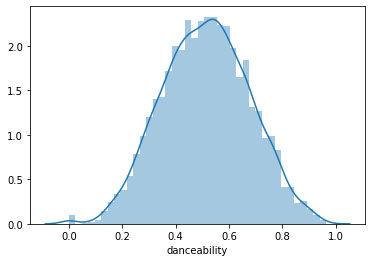

In [35]:
import seaborn as sns
sns.distplot(track_features.danceability)

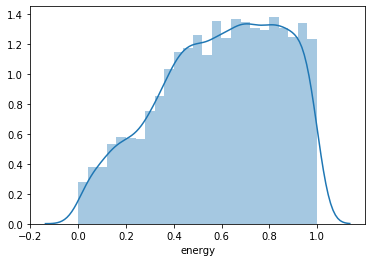

In [36]:
sns.distplot(track_features.energy)

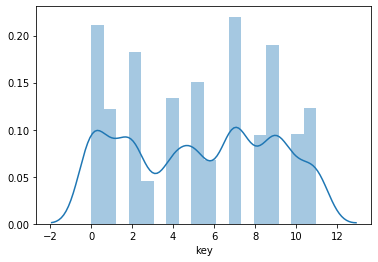

In [37]:
sns.distplot(track_features.key)

In [38]:
track_features.key.value_counts()

7     928
0     892
9     800
2     771
5     637
4     563
11    520
1     515
10    401
8     397
6     285
3     192
Name: key, dtype: int64

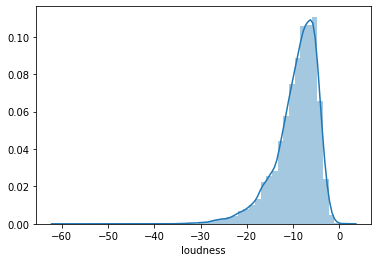

In [39]:
sns.distplot(track_features.loudness)

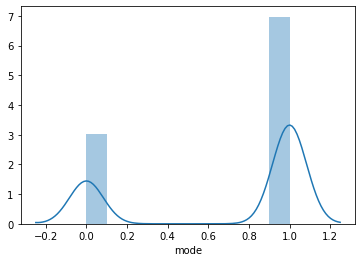

In [45]:
sns.distplot(track_features['mode'])

In [44]:
track_features['mode'].value_counts()

1    4813
0    2088
Name: mode, dtype: int64

In [ ]:
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],

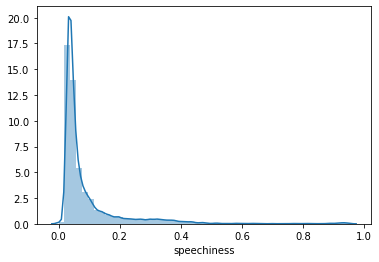

In [46]:
sns.distplot(track_features['speechiness'])

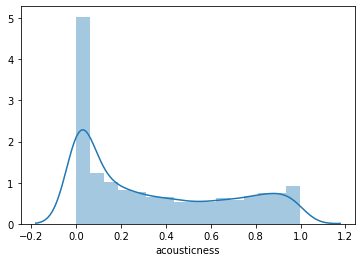

In [47]:
sns.distplot(track_features['acousticness'])

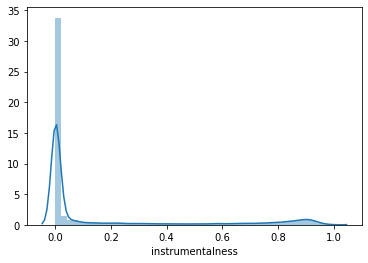

In [48]:
sns.distplot(track_features['instrumentalness'])

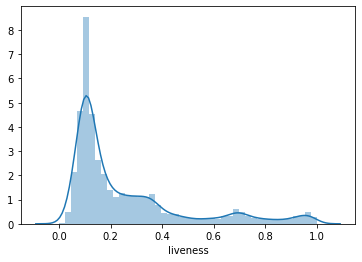

In [49]:
sns.distplot(track_features['liveness'])

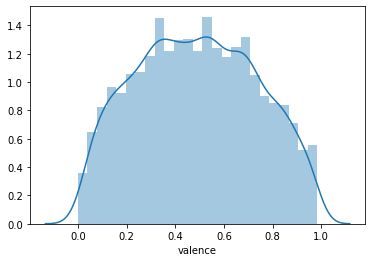

In [50]:
sns.distplot(track_features['valence'])

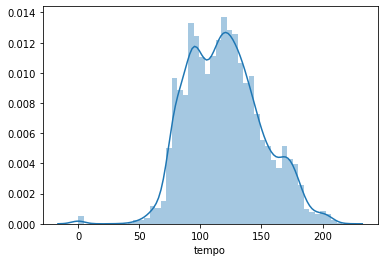

In [51]:
sns.distplot(track_features['tempo'])

In [52]:
track_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.640,0.812,8,-5.647,0,0.0834,0.0860,0.000000,0.0509,0.914,86.013,audio_features,7oolFzHipTMg2nL7shhdz2,spotify:track:7oolFzHipTMg2nL7shhdz2,https://api.spotify.com/v1/tracks/7oolFzHipTMg...,https://api.spotify.com/v1/audio-analysis/7ool...,227427,4
1,0.461,0.834,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,audio_features,6PCUP3dWmTjcTtXY02oFdT,spotify:track:6PCUP3dWmTjcTtXY02oFdT,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,https://api.spotify.com/v1/audio-analysis/6PCU...,261154,4
2,0.761,0.386,4,-6.158,1,0.0399,0.3550,0.000000,0.0953,0.526,134.943,audio_features,51ChrwmUPDJvedPQnIU8Ls,spotify:track:51ChrwmUPDJvedPQnIU8Ls,https://api.spotify.com/v1/tracks/51ChrwmUPDJv...,https://api.spotify.com/v1/audio-analysis/51Ch...,238440,3
3,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4
4,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,audio_features,0tgVpDi06FyKpA1z0VMD4v,spotify:track:0tgVpDi06FyKpA1z0VMD4v,https://api.spotify.com/v1/tracks/0tgVpDi06FyK...,https://api.spotify.com/v1/audio-analysis/0tgV...,263400,3
